In [1]:
import pandas as pd

transactional_data_retail01 = pd.read_csv('Transactional_data_retail_01.csv')
transactional_data_retail02 = pd.read_csv('Transactional_data_retail_02.csv')
customer_demographics = pd.read_csv('CustomerDemographics.csv')
product_info = pd.read_csv('ProductInfo.csv')

print("Transactional Data Retail 01:")
print(transactional_data_retail01.head())

print("\nTransactional Data Retail 02:")
print(transactional_data_retail02.head())

print("\nCustomer Demographics:")
print(customer_demographics)

print("\nProduct Info:")
print(product_info)


Transactional Data Retail 01:
  Invoice StockCode  Quantity  Price  Customer ID       InvoiceDate
0  489434     85048        12   6.95      13085.0  01 December 2021
1  489434    79323P        12   6.75      13085.0  01 December 2021
2  489434    79323W        12   6.75      13085.0  01 December 2021
3  489434     22041        48   2.10      13085.0  01 December 2021
4  489434     21232        24   1.25      13085.0  01 December 2021

Transactional Data Retail 02:
  Invoice StockCode  Quantity  Price  Customer ID InvoiceDate
0  536365    85123A         6   2.55      17850.0  01-12-2022
1  536365     71053         6   3.39      17850.0  01-12-2022
2  536365    84406B         8   2.75      17850.0  01-12-2022
3  536365    84029G         6   3.39      17850.0  01-12-2022
4  536365    84029E         6   3.39      17850.0  01-12-2022

Customer Demographics:
    Customer ID         Country
0         13085  United Kingdom
1         13078  United Kingdom
2         15362  United Kingdom
3      

In [2]:
# merge transactional data retail 1, 2

transactional_data_retail = pd.concat([transactional_data_retail01, transactional_data_retail02], ignore_index=True)
print(transactional_data_retail)


        Invoice StockCode  Quantity  Price  Customer ID       InvoiceDate
0        489434     85048        12   6.95      13085.0  01 December 2021
1        489434    79323P        12   6.75      13085.0  01 December 2021
2        489434    79323W        12   6.75      13085.0  01 December 2021
3        489434     22041        48   2.10      13085.0  01 December 2021
4        489434     21232        24   1.25      13085.0  01 December 2021
...         ...       ...       ...    ...          ...               ...
1067366  581587     22899         6   2.10      12680.0        09-12-2023
1067367  581587     23254         4   4.15      12680.0        09-12-2023
1067368  581587     23255         4   4.15      12680.0        09-12-2023
1067369  581587     22138         3   4.95      12680.0        09-12-2023
1067370  581587      POST         1  18.00      12680.0        09-12-2023

[1067371 rows x 6 columns]


In [3]:
# Replace 'common_column' with the actual column name that is present in both DataFrames
merged_df = pd.merge(customer_demographics,transactional_data_retail, on='Customer ID', how='inner')

# Display the merged DataFrame
print("\nMerged DataFrame:")
print(merged_df.head())
merged_df1=pd.merge(merged_df,product_info,on='StockCode',how='inner')
print(merged_df1)


Merged DataFrame:
   Customer ID         Country Invoice StockCode  Quantity  Price  \
0        13085  United Kingdom  489434     85048        12   6.95   
1        13085  United Kingdom  489434    79323P        12   6.75   
2        13085  United Kingdom  489434    79323W        12   6.75   
3        13085  United Kingdom  489434     22041        48   2.10   
4        13085  United Kingdom  489434     21232        24   1.25   

        InvoiceDate  
0  01 December 2021  
1  01 December 2021  
2  01 December 2021  
3  01 December 2021  
4  01 December 2021  
       Customer ID         Country Invoice StockCode  Quantity  Price  \
0            13085  United Kingdom  489434     85048        12   6.95   
1            13085  United Kingdom  489434    79323P        12   6.75   
2            13085  United Kingdom  489434    79323P        12   6.75   
3            13085  United Kingdom  489434    79323P        12   6.75   
4            13085  United Kingdom  489434    79323W        12   6.75

In [4]:
df=merged_df1
df

,Customer ID,Country,Invoice,StockCode,Quantity,Price,InvoiceDate,Description
0,13085,United Kingdom,489434,85048,12,6.95,01 December 2021,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,13085,United Kingdom,489434,79323P,12,6.75,01 December 2021,PINK CHERRY LIGHTS
2,13085,United Kingdom,489434,79323P,12,6.75,01 December 2021,"Unsaleable, destroyed."
3,13085,United Kingdom,489434,79323P,12,6.75,01 December 2021,NaN
4,13085,United Kingdom,489434,79323W,12,6.75,01 December 2021,WHITE CHERRY LIGHTS
...,...,...,...,...,...,...,...,...
59615,17920,United Kingdom,580672,21620,4,1.25,05-12-2023,SET OF 4 ROSE BOTANICAL CANDLES
59616,17920,United Kingdom,580672,21620,4,1.25,05-12-2023,mystery! Only ever imported 1800
59617,17920,United Kingdom,580672,21620,4,1.25,05-12-2023,check
59618,17920,United Kingdom,580672,21620,4,1.25,05-12-2023,NaN


In [5]:
# Customer-level summary statistics
customer_summary = transactional_data_retail.groupby('Customer ID').agg({
    'Invoice': 'nunique',  # Number of transactions per customer
    'StockCode': 'nunique',     # Number of unique products purchased per customer
    'Quantity': 'sum',           # Total quantity purchased per customer
    'Price': 'sum'              # Total sales per customer # Changed 'Total_Price' to 'TotalPrice'
})

print("\nCustomer-level Summary Statistics:")
print(customer_summary)


# Item-level summary statistics
item_summary = transactional_data_retail.groupby('StockCode').agg({
    'Invoice': 'nunique',  # Number of transactions per product
    'Customer ID': 'nunique',    # Number of unique customers who purchased the product
    'Quantity': 'sum',           # Total quantity sold per product
    'Price': 'sum'              # Total sales per product # Changed 'Total_Price' to 'TotalPrice'
})

print("\nItem-level Summary Statistics:")
print(item_summary)


# Transaction-level summary statistics
transaction_summary = transactional_data_retail.agg({
    'Invoice': 'nunique',  # Total number of transactions
    'Customer ID': 'nunique',    # Total number of unique customers
    'StockCode': 'nunique',     # Total number of unique products
    'Quantity': 'sum',           # Total quantity sold
    'Price': 'sum'              # Total sales # Changed 'Total_Price' to 'TotalPrice'
})

print("\nTransaction-level Summary Statistics:")
print(transaction_summary)


Customer-level Summary Statistics:
             Invoice  StockCode  Quantity    Price
Customer ID                                       
12346.0           17         30        52   580.44
12347.0            8        126      3286   644.16
12348.0            5         25      2714   193.10
12349.0            5        139      1619  1504.59
12350.0            1         17       197    65.30
...              ...        ...       ...      ...
18283.0           22        352      1733  1719.75
18284.0            2         28       493   116.09
18285.0            1         12       145   100.20
18286.0            3         67       592   306.55
18287.0            8        121      3011   348.89

[5942 rows x 4 columns]

Item-level Summary Statistics:
              Invoice  Customer ID  Quantity   Price
StockCode                                           
10002             371          164      7790  391.66
10002R              3            0         4   15.40
10080              30           

In [6]:
# information) without explicit data merging
!pip install pandasql

In [7]:
import pandas as pd
import sqlite3

df = pd.DataFrame(df)
# Connect to SQLite database
conn = sqlite3.connect(':memory:')  # In-memory database

# Load DataFrame into SQLite table
df.to_sql('transactional_data_retail', conn, index=False, if_exists='replace')

# Write your SQL query
query = """
SELECT
    t.`Customer ID`,
    t.Country,
    t.Invoice,
    t.StockCode,
    t.Quantity,
    t.Price,
    t.InvoiceDate,
    t.Description
FROM
    transactional_data_retail AS t
"""

# Execute query and load result into a new DataFrame
result_df = pd.read_sql(query, conn)
# Show the result
print(result_df)
# Close the connection
conn.close()

       Customer ID         Country Invoice StockCode  Quantity  Price  \
0            13085  United Kingdom  489434     85048        12   6.95   
1            13085  United Kingdom  489434    79323P        12   6.75   
2            13085  United Kingdom  489434    79323P        12   6.75   
3            13085  United Kingdom  489434    79323P        12   6.75   
4            13085  United Kingdom  489434    79323W        12   6.75   
...            ...             ...     ...       ...       ...    ...   
59615        17920  United Kingdom  580672     21620         4   1.25   
59616        17920  United Kingdom  580672     21620         4   1.25   
59617        17920  United Kingdom  580672     21620         4   1.25   
59618        17920  United Kingdom  580672     21620         4   1.25   
59619        17920  United Kingdom  580672     21620         4   1.25   

            InvoiceDate                          Description  
0      01 December 2021  15CM CHRISTMAS GLASS BALL 20 LIGHTS

In [8]:
# Create in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Load DataFrame into SQLite database
df.to_sql('transactional_data_retail', conn, index=False, if_exists='replace')

# 1. Summary by Customer Level: Total Quantity and Total Revenue per Customer
customer_query = """
SELECT
    `Customer ID`,
    SUM(Quantity) AS TotalQuantity,
    SUM(Quantity * Price) AS TotalRevenue
FROM
    transactional_data_retail
GROUP BY
    `Customer ID`
"""
customer_summary = pd.read_sql(customer_query, conn)
print("Customer Summary:")
print(customer_summary)

# 2. Summary by Item Level: Total Quantity and Average Price per Item (StockCode)
item_query = """
SELECT
    StockCode,
    SUM(Quantity) AS TotalQuantity,
    AVG(Price) AS AveragePrice
FROM
    transactional_data_retail
GROUP BY
    StockCode
"""
item_summary = pd.read_sql(item_query, conn)
print("\nItem Summary:")
print(item_summary)

# 3. Summary by Transaction Level: Total Quantity and Total Price per Invoice
transaction_query = """
SELECT
    Invoice,
    SUM(Quantity) AS TotalQuantity,
    SUM(Quantity * Price) AS TotalTransactionPrice
FROM
    transactional_data_retail
GROUP BY
    Invoice
"""
transaction_summary = pd.read_sql(transaction_query, conn)
print("\nTransaction Summary:")
print(transaction_summary)
# Close the connection
conn.close()

Customer Summary:
    Customer ID  TotalQuantity  TotalRevenue
0         12362           4058  9.949020e+03
1         12431          11173  2.596919e+04
2         12583          15648  2.713775e+04
3         12636              2  2.820000e+02
4         12682          27808  6.258408e+04
5         12791            816  1.570610e+03
6         13047           7562  1.974576e+04
7         13078          33556  7.467911e+04
8         13085           1643  4.659560e+03
9         13408          60389  1.165066e+05
10        13448           7770  1.704870e+04
11        13635           3728  6.243220e+03
12        13705           2050  5.156560e+03
13        13747            156  6.978000e+02
14        13748           2674  5.625560e+03
15        13758          11537  2.135250e+04
16        13767          29611  7.995053e+04
17        14045          10813  2.331971e+04
18        14110          14033  3.239514e+04
19        14307           6180  1.006475e+04
20        14527          15085  6.275

### Design and develop visualizations which should help to explain the data and summary statistics

#### Import Libraries

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better visuals
sns.set(style="whitegrid")

#### Load and Summarize Data

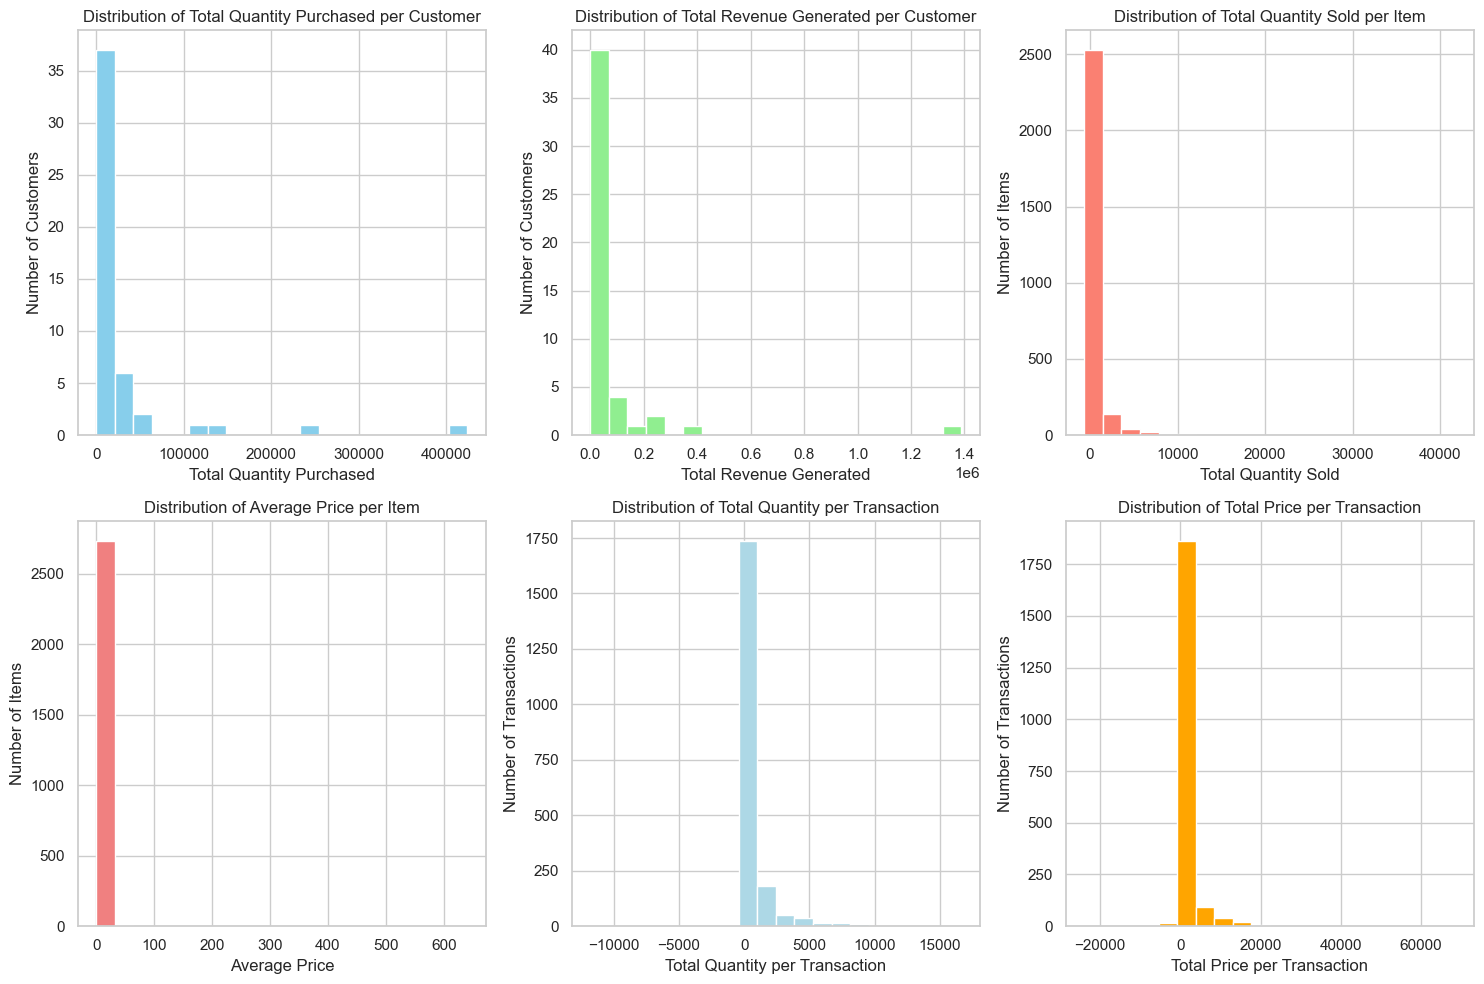

In [10]:
# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the 2D array of axes to make it easier to iterate
axs = axs.flatten()

# Visualizations for Customer Summary
axs[0].hist(customer_summary['TotalQuantity'], bins=20, color='skyblue')
axs[0].set_xlabel('Total Quantity Purchased')
axs[0].set_ylabel('Number of Customers')
axs[0].set_title('Distribution of Total Quantity Purchased per Customer')

axs[1].hist(customer_summary['TotalRevenue'], bins=20, color='lightgreen')
axs[1].set_xlabel('Total Revenue Generated')
axs[1].set_ylabel('Number of Customers')
axs[1].set_title('Distribution of Total Revenue Generated per Customer')

# Visualizations for Item Summary
axs[2].hist(item_summary['TotalQuantity'], bins=20, color='salmon')
axs[2].set_xlabel('Total Quantity Sold')
axs[2].set_ylabel('Number of Items')
axs[2].set_title('Distribution of Total Quantity Sold per Item')

axs[3].hist(item_summary['AveragePrice'], bins=20, color='lightcoral')
axs[3].set_xlabel('Average Price')
axs[3].set_ylabel('Number of Items')
axs[3].set_title('Distribution of Average Price per Item')

# Visualizations for Transaction Summary
axs[4].hist(transaction_summary['TotalQuantity'], bins=20, color='lightblue')
axs[4].set_xlabel('Total Quantity per Transaction')
axs[4].set_ylabel('Number of Transactions')
axs[4].set_title('Distribution of Total Quantity per Transaction')

axs[5].hist(transaction_summary['TotalTransactionPrice'], bins=20, color='orange')
axs[5].set_xlabel('Total Price per Transaction')
axs[5].set_ylabel('Number of Transactions')
axs[5].set_title('Distribution of Total Price per Transaction')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Visualizations
1. Customer-Level Visualization: Total Revenue by Customer

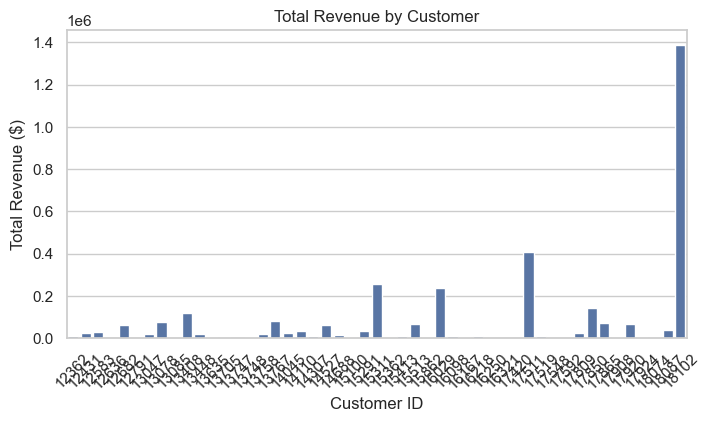

In [11]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Customer ID', y='TotalRevenue', data=customer_summary)
plt.title("Total Revenue by Customer")
plt.xlabel("Customer ID")
plt.xticks(rotation=45)
plt.ylabel("Total Revenue ($)")
plt.show()

2. Item-Level Visualization: Quantity Sold and Average Price by Item

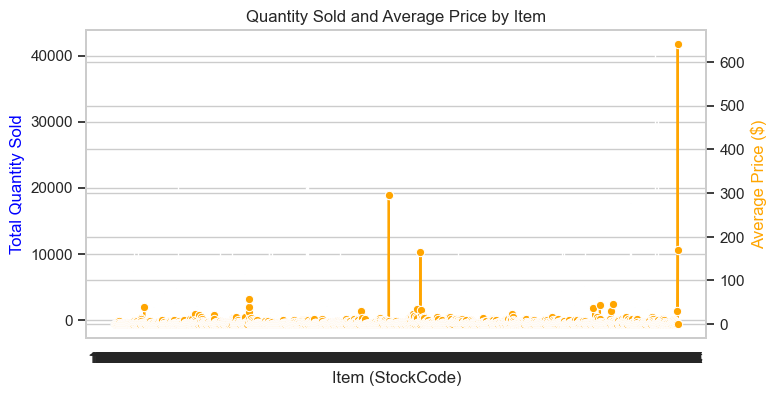

In [12]:
fig, ax1 = plt.subplots(figsize=(8, 4))

# Bar plot for Total Quantity
sns.barplot(x='StockCode', y='TotalQuantity', data=item_summary, color="skyblue", ax=ax1)
ax1.set_xlabel('Item (StockCode)')
ax1.set_ylabel('Total Quantity Sold', color='blue')
ax1.set_title('Quantity Sold and Average Price by Item')

# Create another axis for Average Price
ax2 = ax1.twinx()
sns.lineplot(x='StockCode', y='AveragePrice', data=item_summary, color="orange", marker="o", ax=ax2)
ax2.set_ylabel('Average Price ($)', color='orange')

plt.show()

3. Transaction-Level Visualization: Total Transaction Price by Invoice

Index(['Customer ID', 'Country', 'Invoice', 'StockCode', 'Quantity', 'Price',
       'InvoiceDate', 'Description'],
      dtype='object')


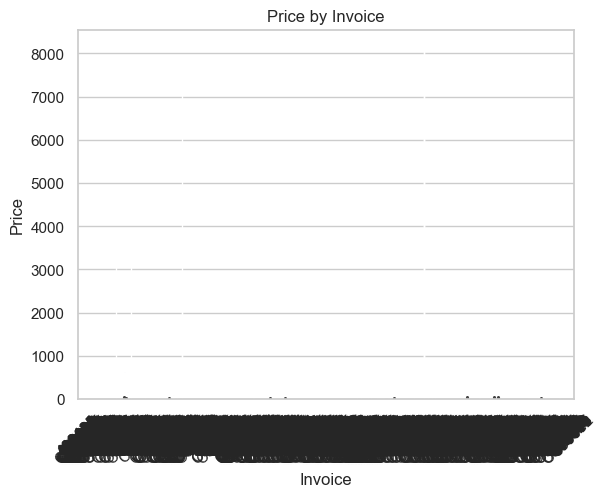

In [13]:
transaction_summary = pd.DataFrame(df)

# Check if the column exists
print(transaction_summary.columns)  # Print column names

# Bar plot
sns.barplot(x='Invoice', y='Price', data=transaction_summary)
plt.title('Price by Invoice')
plt.xlabel('Invoice')
plt.ylabel('Price')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()

4. Time Series Visualization: Transaction Amount Over Time

In [14]:
daily_summary = df.groupby('InvoiceDate').agg(TotalRevenue=('Quantity', lambda x: (x * df.loc[x.index, 'Price']).sum())).reset_index()
daily_summary

,InvoiceDate,TotalRevenue
0,01 April 2022,7415.74
1,01 August 2022,65952.00
2,01 December 2021,23269.45
3,01 December 2022,38361.68
4,01 February 2022,1245.29
...,...,...
532,31-01-2023,1858.67
533,31-03-2023,282.22
534,31-05-2023,1711.76
535,31-08-2023,1433.60


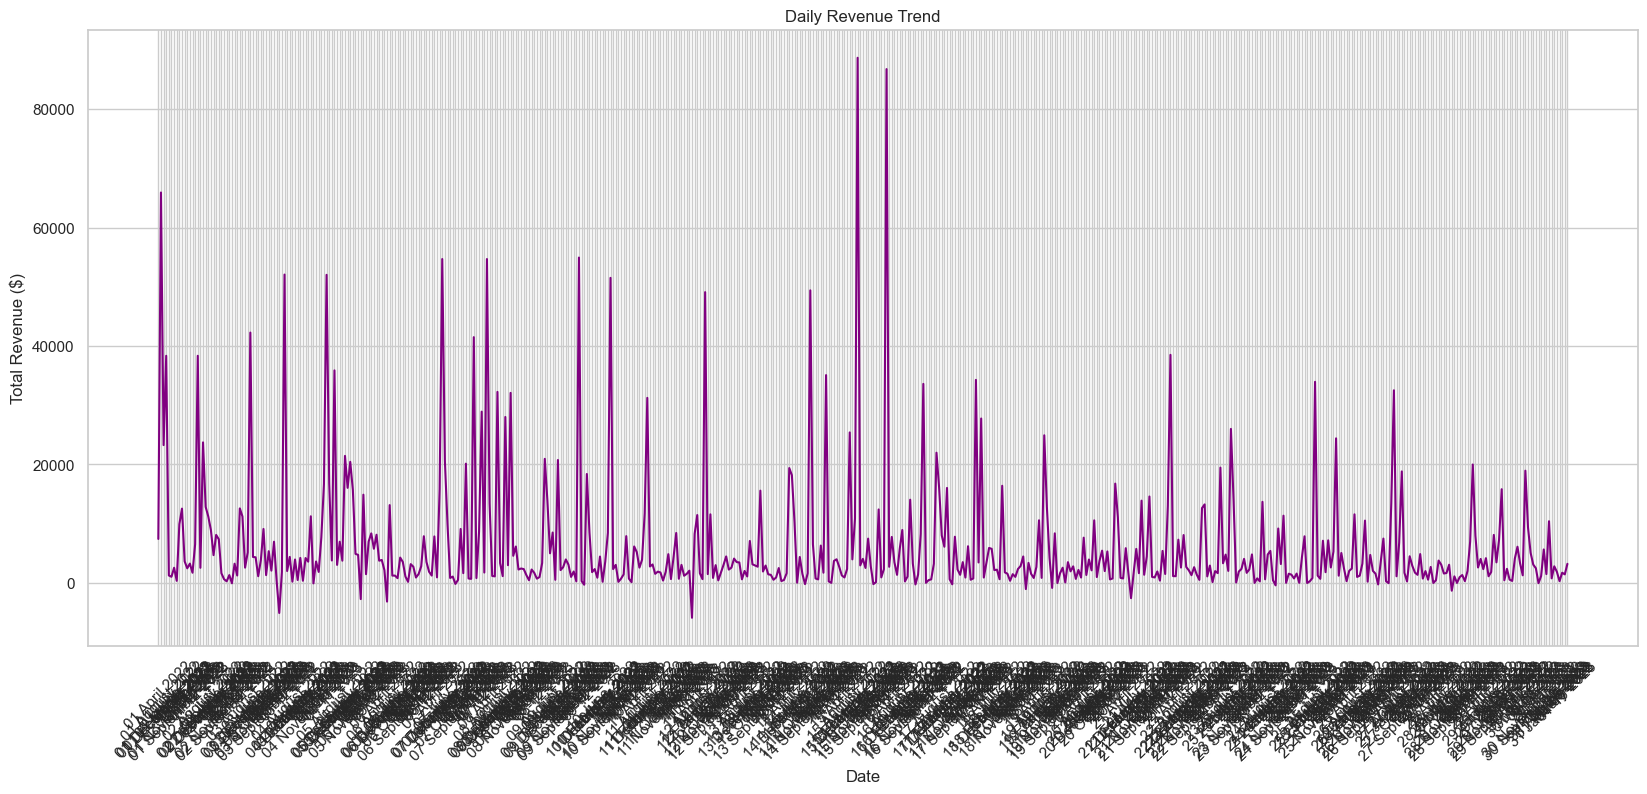

In [15]:
# Group by date to calculate daily revenue
daily_summary = df.groupby('InvoiceDate').agg(TotalRevenue=('Quantity', lambda x: (x * df.loc[x.index, 'Price']).sum())).reset_index()

# Plot the trend over time
plt.figure(figsize=(20, 8))
sns.lineplot(x='InvoiceDate', y='TotalRevenue', data=daily_summary, color="purple")
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.show()


5. Distribution Visualization: Distribution of Total Revenue per Customer

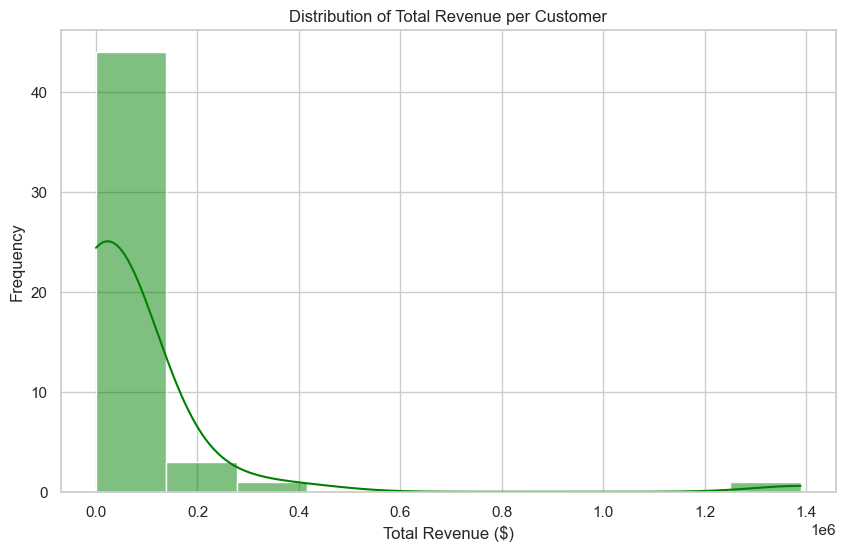

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_summary['TotalRevenue'], kde=True, color='green', bins=10)
plt.title("Distribution of Total Revenue per Customer")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Frequency")
plt.show()

In [17]:
# Display customers with the highest revenue
top_customers = customer_summary.sort_values(by='TotalRevenue', ascending=False).head(10)
print("Top 10 Customers by Total Revenue:")
print(top_customers)

# Display customers with the lowest revenue
low_customers = customer_summary.sort_values(by='TotalRevenue').head(10)
print("\nBottom 10 Customers by Total Revenue:")
print(low_customers)

Top 10 Customers by Total Revenue:
    Customer ID  TotalQuantity  TotalRevenue
48        18102         424225   1388740.190
36        17511         246016    405634.340
24        15311         146516    257250.080
29        16029         121024    236737.720
41        17850          54262    140564.960
9         13408          60389    116506.642
16        13767          29611     79950.530
7         13078          33556     74679.110
42        17865          30163     71472.770
44        17920          28677     64258.660

Bottom 10 Customers by Total Revenue:
    Customer ID  TotalQuantity  TotalRevenue
39        17592              0 -1.421085e-14
3         12636              2  2.820000e+02
34        16321            210  5.841000e+02
13        13747            156  6.978000e+02
38        17548            454  8.469000e+02
25        15362            680  1.185240e+03
33        16250            712  1.468660e+03
5         12791            816  1.570610e+03
35        17420           

In [18]:
# Merge item summary with revenue to calculate total revenue per item
item_summary['TotalRevenue'] = item_summary['TotalQuantity'] * item_summary['AveragePrice']

# Identify top performing items
top_items = item_summary.sort_values(by='TotalRevenue', ascending=False).head(10)
print("Top 10 Products by Total Revenue:")
print(top_items)

# Identify low performing items
low_items = item_summary.sort_values(by='TotalRevenue').head(10)
print("\nBottom 10 Products by Total Revenue:")
print(low_items)

Top 10 Products by Total Revenue:
     StockCode  TotalQuantity  AveragePrice   TotalRevenue
2745         M            214    640.711395  137112.238605
2651    85123A          35620      2.616143   93187.031390
1129     22423           7336     12.216667   89621.466667
571      21623          10486      8.307750   87115.066500
2747      POST            502    169.542593   85110.381481
2183    48173C          13570      6.231250   84558.062500
2293     82484          13118      6.051979   79389.862708
513      21523          12004      6.412202   76972.070826
2189     48188          12040      6.312162   75998.432432
2636    85099B          41736      1.804114   75296.498734

Bottom 10 Products by Total Revenue:
     StockCode  TotalQuantity  AveragePrice  TotalRevenue
2744         D           -650     29.251098 -19013.213415
2269    79323B           -114      6.425000   -732.450000
2281    79340W             -4      6.750000    -27.000000
2245     78056             -2      8.500000    

In [19]:
# Make sure the InvoiceDate is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Create daily_summary by grouping by InvoiceDate
daily_summary = df.groupby('InvoiceDate').agg(TotalRevenue=('Price', lambda x: (x * df.loc[x.index, 'Quantity']).sum())).reset_index()

# Set InvoiceDate as the index
daily_summary.set_index('InvoiceDate', inplace=True)

# Display the first few rows to check
print(daily_summary.head())

             TotalRevenue
InvoiceDate              
2021-12-01       23269.45
2021-12-02       12832.28
2021-12-03       42282.65
2021-12-04        3940.52
2021-12-05        6948.70


C:\Users\parmo\AppData\Local\Temp\ipykernel_881556\1261960170.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_summary = daily_summary.resample('M').sum().reset_index()


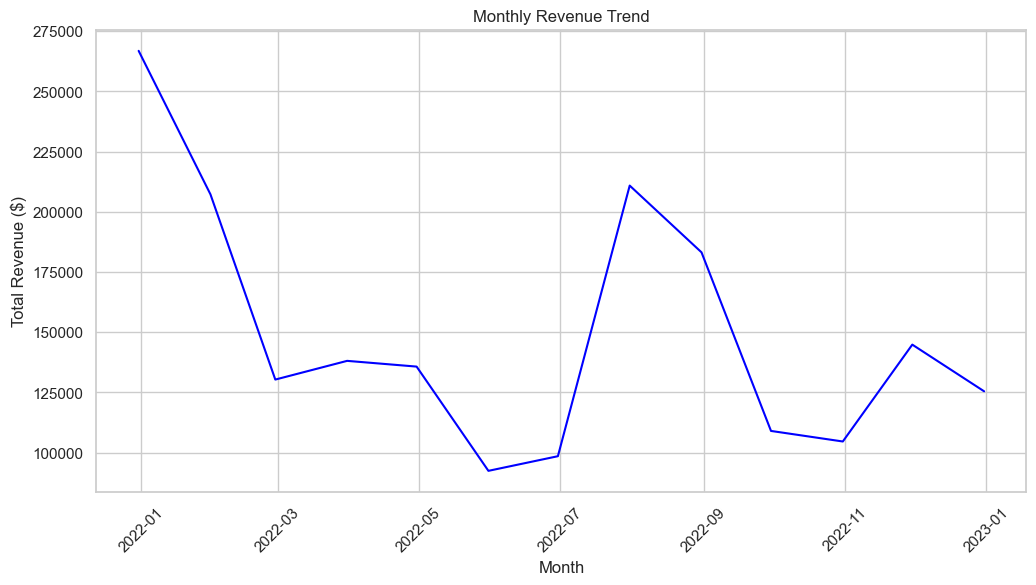

In [20]:
# Group by month for seasonal analysis
monthly_summary = daily_summary.resample('M').sum().reset_index()

# Plot monthly revenue trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='InvoiceDate', y='TotalRevenue', data=monthly_summary, color="blue")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.show()

In [21]:
# Group by StockCode and sum the Quantity
top_stock_codes = df.groupby('StockCode')['Quantity'].sum().reset_index()

# Sort the results to get the top 10 stock codes based on total quantity sold
top_stock_codes = top_stock_codes.sort_values(by='Quantity', ascending=False).head(10)

# Display the top 10 stock codes
print(top_stock_codes)


     StockCode  Quantity
2636    85099B     41736
2651    85123A     35620
311      21181     24120
936      22189     23508
944      22197     21140
935      22188     20084
2515     84879     17670
113      20713     17433
1674     23084     15224
753      21928     14196


### **Visualize** the Results

C:\Users\parmo\AppData\Local\Temp\ipykernel_881556\1732021943.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='StockCode', data=top_stock_codes, palette='viridis')


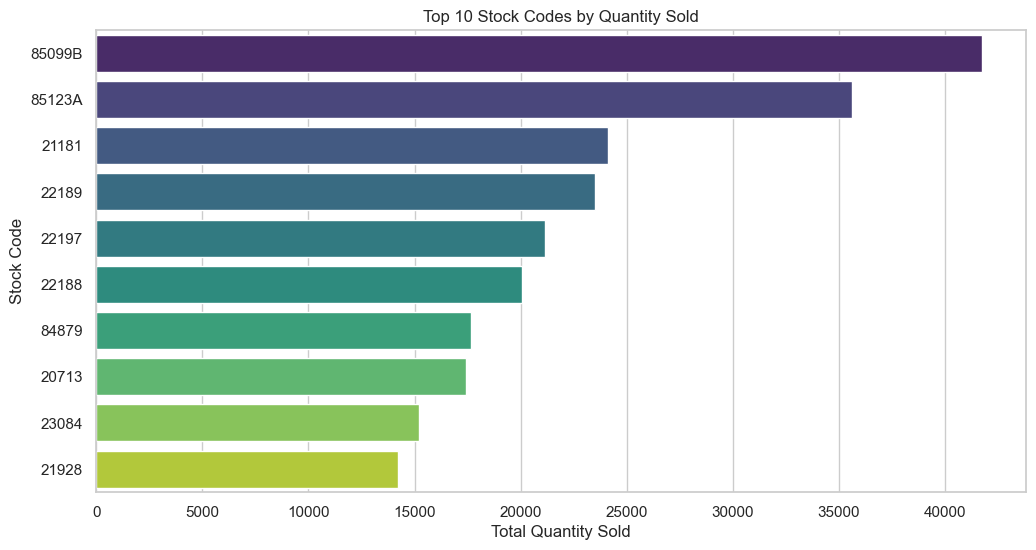

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot for the top 10 stock codes
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='StockCode', data=top_stock_codes, palette='viridis')
plt.title("Top 10 Stock Codes by Quantity Sold")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Stock Code")
plt.show()

#### Calculate **Revenue**

In [23]:
# Calculate Revenue for each transaction
df['Revenue'] = df['Quantity'] * df['Price']
df

,Customer ID,Country,Invoice,StockCode,Quantity,Price,InvoiceDate,Description,Revenue
0,13085,United Kingdom,489434,85048,12,6.95,2021-12-01,15CM CHRISTMAS GLASS BALL 20 LIGHTS,83.4
1,13085,United Kingdom,489434,79323P,12,6.75,2021-12-01,PINK CHERRY LIGHTS,81.0
2,13085,United Kingdom,489434,79323P,12,6.75,2021-12-01,"Unsaleable, destroyed.",81.0
3,13085,United Kingdom,489434,79323P,12,6.75,2021-12-01,NaN,81.0
4,13085,United Kingdom,489434,79323W,12,6.75,2021-12-01,WHITE CHERRY LIGHTS,81.0
...,...,...,...,...,...,...,...,...,...
59615,17920,United Kingdom,580672,21620,4,1.25,NaT,SET OF 4 ROSE BOTANICAL CANDLES,5.0
59616,17920,United Kingdom,580672,21620,4,1.25,NaT,mystery! Only ever imported 1800,5.0
59617,17920,United Kingdom,580672,21620,4,1.25,NaT,check,5.0
59618,17920,United Kingdom,580672,21620,4,1.25,NaT,NaN,5.0


Group and Summarize **Revenue**

In [24]:
# Group by Description (or StockCode) and sum the Revenue
top_revenue_products = df.groupby('Description')['Revenue'].sum().reset_index()

# Sort to get the top 10 products based on revenue
top_revenue_products = top_revenue_products.sort_values(by='Revenue', ascending=False).head(10)

# Display the top 10 revenue products
print(top_revenue_products)

                             Description    Revenue
137                                    ?  125308.01
3393                             damaged   67500.46
3384                               check   39510.61
3438                             missing   34547.17
3396                             damages   33918.28
3144        VINTAGE UNION JACK MEMOBOARD   33669.97
3253   WOOD BLACK BOARD ANT WHITE FINISH   31774.18
744              CREAM HEART CARD HOLDER   28436.88
315              BLACK HEART CARD HOLDER   23553.32
3217  WHITE HANGING HEART T-LIGHT HOLDER   17874.86


Visualize the **Results**

C:\Users\parmo\AppData\Local\Temp\ipykernel_881556\3548378567.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='Description', data=top_revenue_products, palette='magma')


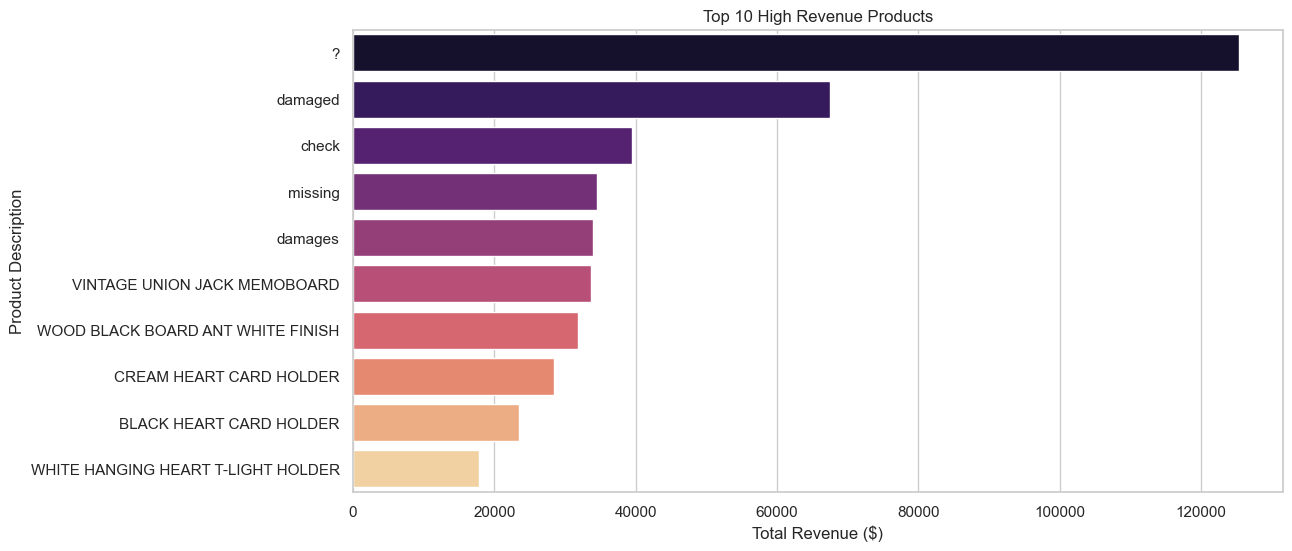

In [25]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot for the top 10 revenue products
plt.figure(figsize=(12, 6))
sns.barplot(x='Revenue', y='Description', data=top_revenue_products, palette='magma')
plt.title("Top 10 High Revenue Products")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Product Description")
plt.show()

### 4. Time Series Analysis (TS):
#### A. Develop and compare various time series models, such as ARIMA, Exponential Smoothing (ETS), Prophet, and advanced models like LSTM
#### Note: The modeling will focus on the top 10 products based on quantity sold or revenue to ensure detailed and accurate forecasting (Explain your reasoning how and why use selected top 10 products).

# Data Preparation

In [26]:
# Calculate Revenue
df['Revenue'] = df['Quantity'] * df['Price']

# Group by date and product description for total quantity sold
time_series_data = df.groupby(['InvoiceDate', 'Description'])['Quantity'].sum().unstack(fill_value=0)

# Select the top 10 products based on quantity sold
top_10_products = time_series_data.sum(axis=0).nlargest(10).index.tolist()
time_series_data_top10 = time_series_data[top_10_products]

# Resample to daily frequency
time_series_data_top10 = time_series_data_top10.resample('D').sum().fillna(0)
time_series_data_top10

Description,?,check,damaged,damages,missing,BLACK HEART CARD HOLDER,21733 mixed,CREAM HANGING HEART T-LIGHT HOLDER,WHITE HANGING HEART T-LIGHT HOLDER,wrongly marked carton 22804
InvoiceDate,,,,,,,,,,
2021-12-01,236,720,262,191,55,0,102,102,102,102
2021-12-02,96,13,13,20,105,0,72,72,72,72
2021-12-03,612,12,600,0,0,0,0,0,0,0
2021-12-04,73,27,173,31,1,0,6,6,6,6
2021-12-05,114,60,0,0,0,0,84,84,84,84
...,...,...,...,...,...,...,...,...,...,...
2022-12-05,33,5,37,4,0,0,0,0,0,0
2022-12-06,8,9,0,10,5,0,0,0,0,0
2022-12-07,51,47,163,9,-1,2016,31,31,31,31


# Time Series Modeling
## A. ARIMA

In [27]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Example for one product
product = top_10_products[0]
model = ARIMA(time_series_data_top10[product], order=(1, 1, 1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=30)  # Forecasting next 30 days
forecast

2022-12-10    60.120629
2022-12-11    60.648718
2022-12-12    60.660280
2022-12-13    60.660533
2022-12-14    60.660539
2022-12-15    60.660539
2022-12-16    60.660539
2022-12-17    60.660539
2022-12-18    60.660539
2022-12-19    60.660539
2022-12-20    60.660539
2022-12-21    60.660539
2022-12-22    60.660539
2022-12-23    60.660539
2022-12-24    60.660539
2022-12-25    60.660539
2022-12-26    60.660539
2022-12-27    60.660539
2022-12-28    60.660539
2022-12-29    60.660539
2022-12-30    60.660539
2022-12-31    60.660539
2023-01-01    60.660539
2023-01-02    60.660539
2023-01-03    60.660539
2023-01-04    60.660539
2023-01-05    60.660539
2023-01-06    60.660539
2023-01-07    60.660539
2023-01-08    60.660539
Freq: D, Name: predicted_mean, dtype: float64

## B. Exponential Smoothing (ETS)

In [28]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_ets = ExponentialSmoothing(time_series_data_top10[product], seasonal='add', seasonal_periods=12)
model_fit_ets = model_ets.fit()

# Forecast
forecast_ets = model_fit_ets.forecast(steps=30)
forecast_ets

2022-12-10     66.118701
2022-12-11     68.869892
2022-12-12     47.032164
2022-12-13    105.431482
2022-12-14     96.330227
2022-12-15     42.709435
2022-12-16    111.595296
2022-12-17     27.051621
2022-12-18     50.159875
2022-12-19     73.049509
2022-12-20     51.555874
2022-12-21     60.125860
2022-12-22     66.118701
2022-12-23     68.869892
2022-12-24     47.032164
2022-12-25    105.431482
2022-12-26     96.330227
2022-12-27     42.709435
2022-12-28    111.595296
2022-12-29     27.051621
2022-12-30     50.159875
2022-12-31     73.049509
2023-01-01     51.555874
2023-01-02     60.125860
2023-01-03     66.118701
2023-01-04     68.869892
2023-01-05     47.032164
2023-01-06    105.431482
2023-01-07     96.330227
2023-01-08     42.709435
Freq: D, dtype: float64

## C. Prophet

In [29]:
!pip install prophet # install the prophet library
from prophet import Prophet # import from prophet instead of fbprophet

# Prepare data for Prophet
prophet_data = time_series_data_top10[product].reset_index()
prophet_data.columns = ['ds', 'y']

model_prophet = Prophet()
model_prophet.fit(prophet_data)

future = model_prophet.make_future_dataframe(periods=30)
forecast_prophet = model_prophet.predict(future)
forecast_prophet

ERROR: Invalid requirement: '#'
16:49:12 - cmdstanpy - INFO - Chain [1] start processing
16:49:12 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-01,115.587765,-26.169318,308.320467,115.587765,115.587765,33.127156,33.127156,33.127156,33.127156,33.127156,33.127156,0.0,0.0,0.0,148.714921
1,2021-12-02,115.082654,-8.053222,320.674583,115.082654,115.082654,36.402120,36.402120,36.402120,36.402120,36.402120,36.402120,0.0,0.0,0.0,151.484774
2,2021-12-03,114.577544,-53.993758,286.698412,114.577544,114.577544,11.660320,11.660320,11.660320,11.660320,11.660320,11.660320,0.0,0.0,0.0,126.237864
3,2021-12-04,114.072433,-34.450451,295.525623,114.072433,114.072433,19.474384,19.474384,19.474384,19.474384,19.474384,19.474384,0.0,0.0,0.0,133.546817
4,2021-12-05,113.567323,-114.503788,208.732845,113.567323,113.567323,-63.243932,-63.243932,-63.243932,-63.243932,-63.243932,-63.243932,0.0,0.0,0.0,50.323391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,2023-01-04,48.326782,-81.255331,263.664777,47.823491,48.869990,33.127156,33.127156,33.127156,33.127156,33.127156,33.127156,0.0,0.0,0.0,81.453938
400,2023-01-05,48.286257,-80.363665,252.157556,47.751669,48.859088,36.402120,36.402120,36.402120,36.402120,36.402120,36.402120,0.0,0.0,0.0,84.688376
401,2023-01-06,48.245732,-116.291615,233.698396,47.677053,48.857319,11.660320,11.660320,11.660320,11.660320,11.660320,11.660320,0.0,0.0,0.0,59.906052
402,2023-01-07,48.205206,-103.211104,240.769095,47.604675,48.857762,19.474384,19.474384,19.474384,19.474384,19.474384,19.474384,0.0,0.0,0.0,67.679590


## D. LSTM

In [30]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
# Prepare data for LSTM
data = time_series_data_top10[product].values
data = data.reshape(-1, 1)

# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Split into training and test sets
train_size = int(len(data_scaled) * 0.8)
train, test = data_scaled[0:train_size], data_scaled[train_size:]

# Create datasets for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train, time_step=10)
X_test, y_test = create_dataset(test, time_step=10)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32)
model_lstm

Epoch 1/50
9/9 [==============================] - 7s 10ms/step - loss: 0.0187
Epoch 2/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0138
Epoch 3/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0133
Epoch 4/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0132
Epoch 5/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0133
Epoch 6/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0134
Epoch 7/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0136
Epoch 8/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 9/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0133
Epoch 10/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0132
Epoch 11/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0133
Epoch 12/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0132
Epoch 13/50
9/9 [==============================] - 0s 10ms/ste

## Model Evaluation

In [31]:
from sklearn.metrics import mean_squared_error

# Assuming 'forecast' contains the predicted values from your model
# and 'test' is the actual values you are trying to compare against

# For example, if 'forecast' is the output of your ARIMA model
forecast_length = 30  # Change this to however many periods you're forecasting
forecast = model_fit.forecast(steps=forecast_length)

# Ensure that 'test' is the correct length (the actual test data)
# Get the last 'forecast_length' values from 'test'
test = test[-forecast_length:]

# Now, check the lengths
print("Forecast Length:", len(forecast))
print("Test Length:", len(test))

# Align forecasts and calculate RMSE
rmse_arima = np.sqrt(mean_squared_error(test, forecast))  # Now they should be the same length

Forecast Length: 30
Test Length: 30


# 5. Non-Time Series Techniques: Apply machine learning models (e.g., DecisionTree, XGBoost) that  leverage non-time series features, such as customer demographics and product features, to predict demand.

Columns in DataFrame before processing: ['Customer ID', 'Country', 'Invoice', 'StockCode', 'Quantity', 'Price', 'InvoiceDate', 'Description', 'Revenue']
Missing values in each column:
 Customer ID        0
Country            0
Invoice            0
StockCode          0
Quantity           0
Price              0
InvoiceDate    24028
Description    11572
Revenue            0
dtype: int64
Data types after one-hot encoding:
 Customer ID               int64
Invoice                  object
Quantity                  int64
InvoiceDate      datetime64[ns]
Description              object
                      ...      
Price_3060.6               bool
Price_3580.8               bool
Price_6930.0               bool
Price_7044.79              bool
Price_8142.75              bool
Length: 3139, dtype: object
Columns in X before splitting: ['Customer ID', 'Revenue']
Decision Tree RMSE: 15.042516067905114
XGBoost RMSE: 31.15630508998537


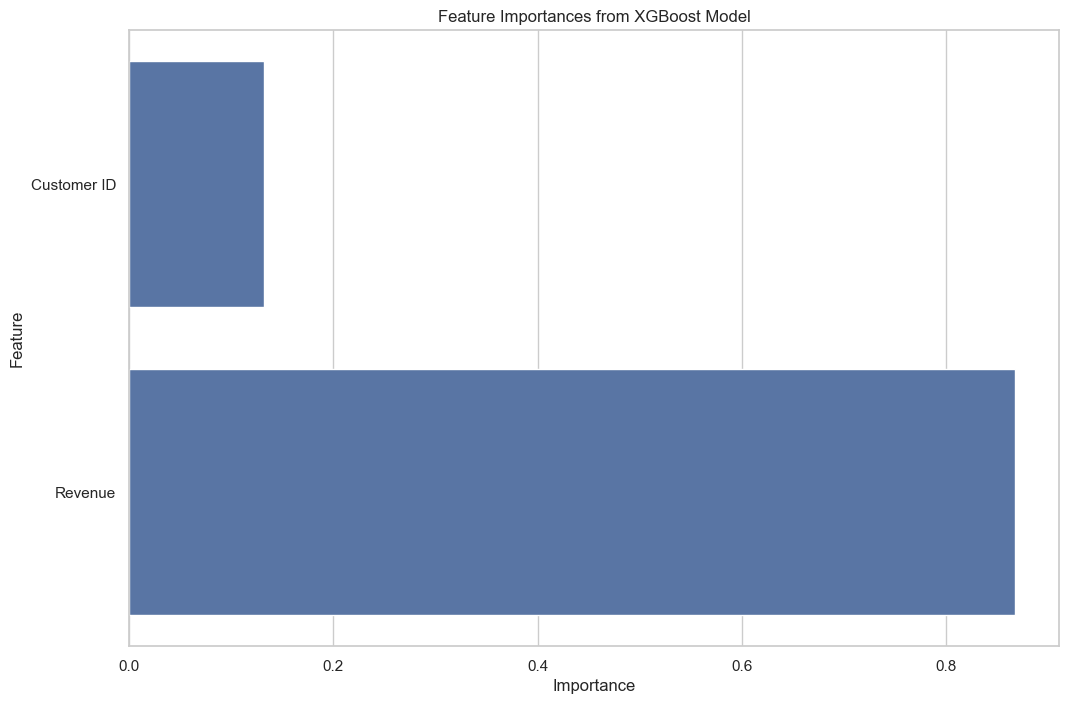

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Print the columns to check if 'Country' and 'StockCode' are present
print("Columns in DataFrame before processing:", df.columns.tolist())

# Strip any leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Features and target variable
features = ['Country', 'StockCode', 'Price']  # You can include more features if needed
target = 'Quantity'  # Assuming quantity sold represents demand

# Check if specified features are in the DataFrame
missing_features = [feature for feature in features if feature not in df.columns]
if missing_features:
    print(f"Warning: The following features are missing from the DataFrame: {missing_features}")

# Preprocessing: One-hot encoding for categorical features
if not missing_features:  # Proceed only if no features are missing
    df = pd.get_dummies(df, columns=features, drop_first=True)  # Drop first to avoid multicollinearity

# After one-hot encoding, check data types
print("Data types after one-hot encoding:\n", df.dtypes)

# Ensure that all features are numeric
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_columns) > 0:
    print(f"Warning: The following columns are non-numeric: {non_numeric_columns.tolist()}")
    # Drop non-numeric columns from the DataFrame
    df = df.drop(columns=non_numeric_columns)


# Splitting data into features and target
X = df.drop(columns=[target])  # Features
y = df[target]  # Target variable

# Check for non-numeric types in the feature set
print("Columns in X before splitting:", X.columns.tolist())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# XGBoost Model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# Evaluate models
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))

print(f"Decision Tree RMSE: {dt_rmse}")
print(f"XGBoost RMSE: {xgb_rmse}")

# Visualize feature importances for XGBoost
plt.figure(figsize=(12, 8))
sns.barplot(x=xgb_model.feature_importances_, y=X.columns)
plt.title("Feature Importances from XGBoost Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## 6. Training and Validation Strategy: Define robust training and validation strategies, such as time-based cross-validation, to ensure the models generalize well to unseen data

In [33]:
def time_based_cross_validation(data, target_variable, n_splits=5):
    n = len(data)
    if n < n_splits:
        raise ValueError("Number of splits cannot be greater than the number of samples in the data.")

    fold_size = n // n_splits
    rmse_results = []

    for i in range(n_splits):
        # Ensure the last fold includes remaining samples
        start_index = i * fold_size
        end_index = (i + 1) * fold_size if i < n_splits - 1 else n  # Include all remaining samples in the last fold

        train_data = data.iloc[:end_index]
        test_data = data.iloc[end_index:(end_index + fold_size)]

        if test_data.empty:  # Avoid empty test set
            break

        X_train = train_data.drop(columns=[target_variable])
        y_train = train_data[target_variable]
        X_test = test_data.drop(columns=[target_variable])
        y_test = test_data[target_variable]

        # Train the models
        dt_model = DecisionTreeRegressor(random_state=42)
        dt_model.fit(X_train, y_train)

        xgb_model = XGBRegressor(random_state=42)
        xgb_model.fit(X_train, y_train)

        # Make predictions
        dt_predictions = dt_model.predict(X_test)
        xgb_predictions = xgb_model.predict(X_test)

        # Calculate RMSE
        dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
        xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))

        rmse_results.append((dt_rmse, xgb_rmse))

    return rmse_results

# Run time-based cross-validation
results = time_based_cross_validation(df, target)
if results:  # Check if there are results
    dt_rmses, xgb_rmses = zip(*results)

    print("Decision Tree RMSEs across folds:", dt_rmses)
    print("XGBoost RMSEs across folds:", xgb_rmses)
    print("Average Decision Tree RMSE:", np.mean(dt_rmses))
    print("Average XGBoost RMSE:", np.mean(xgb_rmses))
else:
    print("No results to display. Please check the data.")

Decision Tree RMSEs across folds: (13.398996486323968, 24.81324175487788, 193.460675263364, 31.474902930291336)
XGBoost RMSEs across folds: (12.977088659584162, 25.314421413784096, 129.60639684580238, 30.217841685114074)
Average Decision Tree RMSE: 65.7869541087143
Average XGBoost RMSE: 49.528937151071176


## 7. Forecasting Horizon: Provide a weekly forecast for the next 15 weeks for the top 10 products.

In [34]:
df=merged_df1
df

,Customer ID,Country,Invoice,StockCode,Quantity,Price,InvoiceDate,Description
0,13085,United Kingdom,489434,85048,12,6.95,01 December 2021,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,13085,United Kingdom,489434,79323P,12,6.75,01 December 2021,PINK CHERRY LIGHTS
2,13085,United Kingdom,489434,79323P,12,6.75,01 December 2021,"Unsaleable, destroyed."
3,13085,United Kingdom,489434,79323P,12,6.75,01 December 2021,NaN
4,13085,United Kingdom,489434,79323W,12,6.75,01 December 2021,WHITE CHERRY LIGHTS
...,...,...,...,...,...,...,...,...
59615,17920,United Kingdom,580672,21620,4,1.25,05-12-2023,SET OF 4 ROSE BOTANICAL CANDLES
59616,17920,United Kingdom,580672,21620,4,1.25,05-12-2023,mystery! Only ever imported 1800
59617,17920,United Kingdom,580672,21620,4,1.25,05-12-2023,check
59618,17920,United Kingdom,580672,21620,4,1.25,05-12-2023,NaN


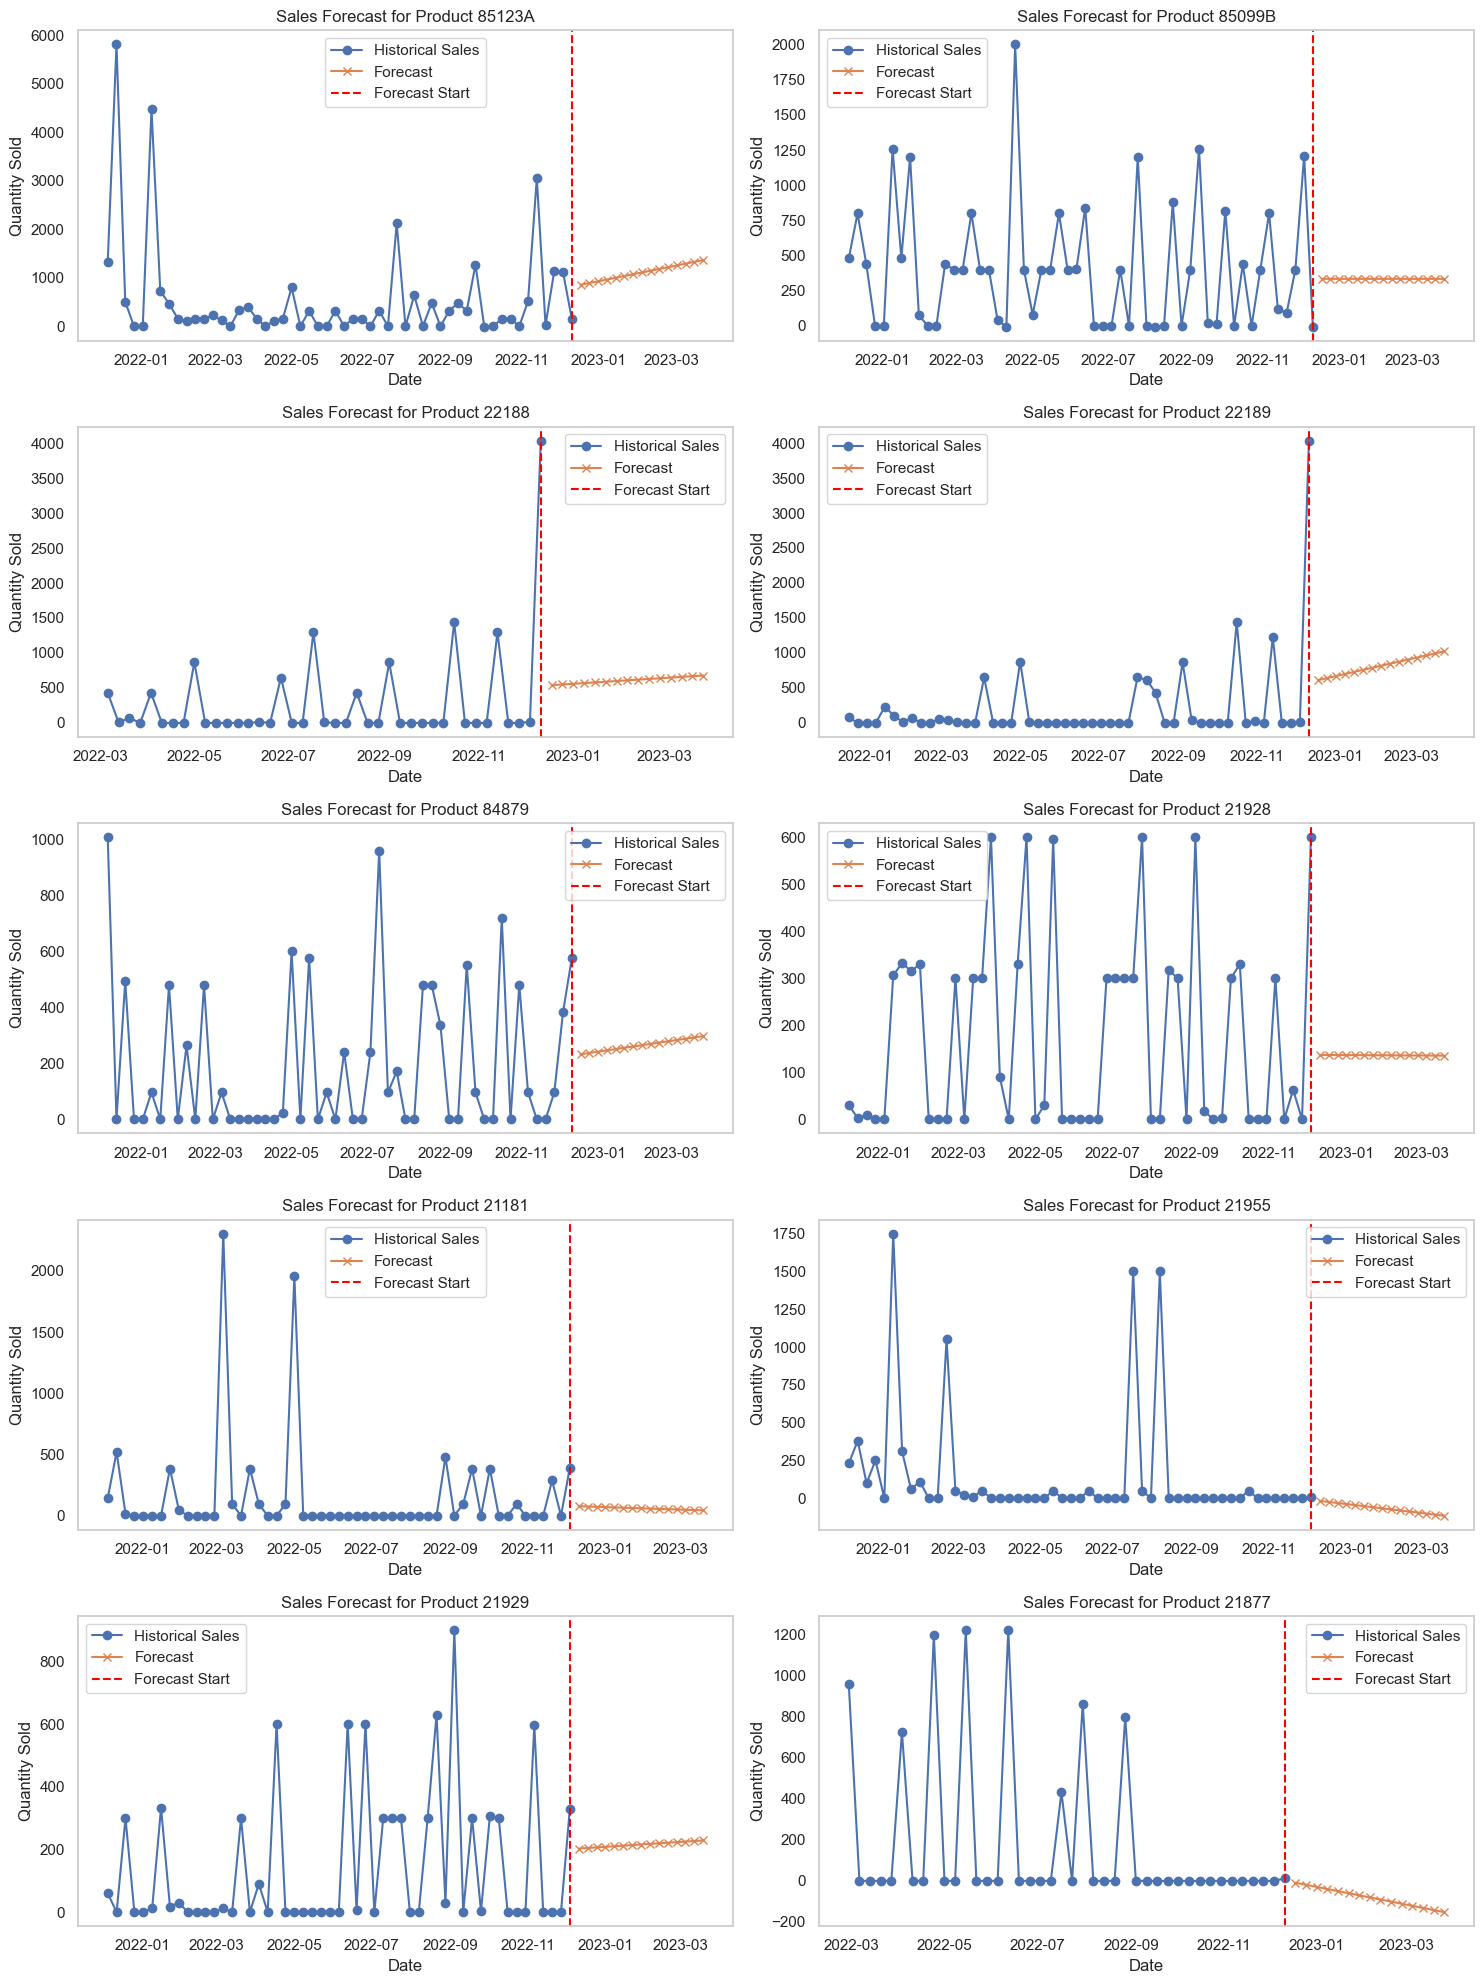

Forecasted Values for 85123A:
2022-12-18     854.604631
2022-12-25     891.004383
2023-01-01     927.404134
2023-01-08     963.803886
2023-01-15    1000.203637
2023-01-22    1036.603389
2023-01-29    1073.003140
2023-02-05    1109.402892
2023-02-12    1145.802643
2023-02-19    1182.202395
2023-02-26    1218.602146
2023-03-05    1255.001898
2023-03-12    1291.401649
2023-03-19    1327.801401
2023-03-26    1364.201152
Freq: W-SUN, dtype: float64
Forecasted Values for 85099B:
2022-12-18    334.890380
2022-12-25    334.873877
2023-01-01    334.857375
2023-01-08    334.840872
2023-01-15    334.824369
2023-01-22    334.807867
2023-01-29    334.791364
2023-02-05    334.774861
2023-02-12    334.758359
2023-02-19    334.741856
2023-02-26    334.725354
2023-03-05    334.708851
2023-03-12    334.692348
2023-03-19    334.675846
2023-03-26    334.659343
Freq: W-SUN, dtype: float64
Forecasted Values for 22188:
2022-12-18    540.248581
2022-12-25    550.080247
2023-01-01    559.911913
2023-01-08    5

In [35]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt


# Data Preparation
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce', dayfirst=True)
df.dropna(subset=['InvoiceDate'], inplace=True)

# Identify the Top 10 Products based on Quantity Sold
top_products = df.groupby('StockCode')['Quantity'].sum().nlargest(10).index.tolist()

# Prepare Weekly Sales Data for Each Product
weekly_sales = {}
for product in top_products:
    product_sales = df[df['StockCode'] == product].set_index('InvoiceDate').resample('W').sum()['Quantity']
    weekly_sales[product] = product_sales

# Forecast for Each Product
forecast_results = {}
forecast_period = 15  # Forecasting the next 15 weeks

# Set up a 2x5 matrix for plotting
fig, axes = plt.subplots(5,2, figsize=(15, 20))
axes = axes.flatten()  # Flatten the 2D array to 1D for easy indexing

for i, (product, sales) in enumerate(weekly_sales.items()):
    if len(sales) < 15:  # Minimum data points to fit a simple model
        print(f"Not enough data to fit model for {product}. Found {len(sales)} data points.")
        continue

    try:
        # Fit a non-seasonal model
        model = ExponentialSmoothing(sales, trend='add', seasonal=None)
        model_fit = model.fit()

        # Forecast for the next 15 weeks
        forecast = model_fit.forecast(forecast_period)
        forecast_results[product] = forecast

        # Plotting each product forecast
        ax = axes[i]
        ax.plot(sales.index, sales, label='Historical Sales', marker='o')
        ax.plot(forecast.index, forecast, label='Forecast', marker='x')
        ax.set_title(f'Sales Forecast for Product {product}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Quantity Sold')
        ax.axvline(x=sales.index[-1], color='red', linestyle='--', label='Forecast Start')
        ax.legend()
        ax.grid()

    except Exception as e:
        print(f"Could not fit model for {product}: {e}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Display forecast results
for product, forecast in forecast_results.items():
    print(f"Forecasted Values for {product}:")
    print(forecast)

## 8. Error and Evaluation Metrics: Use appropriate error metrics (e.g., RMSE,MAE) and evaluation criteria to assess model performance.

In [39]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Data Preparation (Assuming df is already prepared)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce', dayfirst=True)
df.dropna(subset=['InvoiceDate'], inplace=True)

# Identify the Top 10 Products based on Quantity Sold
top_products = df.groupby('StockCode')['Quantity'].sum().nlargest(10).index.tolist()

# Prepare Weekly Sales Data for Each Product
weekly_sales = {}
for product in top_products:
    product_sales = df[df['StockCode'] == product].set_index('InvoiceDate').resample('W').sum()['Quantity']
    weekly_sales[product] = product_sales

# Forecast for Each Product
forecast_results = {}
error_metrics = {}

forecast_period = 15  # Forecasting the next 15 weeks

for product, sales in weekly_sales.items():
    if len(sales) < 15:  # Minimum data points to fit a simple model
        print(f"Not enough data to fit model for {product}. Found {len(sales)} data points.")
        continue

    try:
        # Fit a non-seasonal model
        model = ExponentialSmoothing(sales, trend='add', seasonal=None)
        model_fit = model.fit()

        # Forecast for the next 15 weeks
        forecast = model_fit.forecast(forecast_period)
        forecast_results[product] = forecast

        # Calculate RMSE and MAE for the last actual period before the forecast
        actual_last_period = sales[-forecast_period:]  # Actual values for the forecast period

        # Ensure we have enough actual data to compute metrics
        if len(actual_last_period) == forecast_period:
            rmse = np.sqrt(mean_squared_error(actual_last_period, forecast))
            mae = mean_absolute_error(actual_last_period, forecast)
            error_metrics[product] = {'RMSE': rmse, 'MAE': mae}
        else:
            print(f"Not enough actual data to compute metrics for {product}.")

    except Exception as e:
        print(f"Could not fit model for {product}: {e}")

# Display error metrics
print("\nError Metrics for Each Product:")
for product, metrics in error_metrics.items():
    print(f"{product}: RMSE = {metrics['RMSE']:.2f}, MAE = {metrics['MAE']:.2f}")


Error Metrics for Each Product:
85123A: RMSE = 927.54, MAE = 814.42
85099B: RMSE = 427.12, MAE = 343.01
22188: RMSE = 1050.27, MAE = 789.34
22189: RMSE = 1062.25, MAE = 872.12
84879: RMSE = 257.71, MAE = 245.00
21928: RMSE = 214.25, MAE = 181.83
21181: RMSE = 195.04, MAE = 143.78
21955: RMSE = 77.67, MAE = 70.18
21929: RMSE = 266.96, MAE = 223.90
21877: RMSE = 93.48, MAE = 81.52


- Ensure the forecast period aligns with your data availability.
- Modify the handling of cases with insufficient data according to your needs.
- You can visualize the error metrics if desired for better insights.

## 9. ACF and PACF Plots: Analyze Auto-Correlation Function (ACF) and Partial Auto-Correlation Function (PACF) plots to identify trends, seasonality, and lags in time series data.

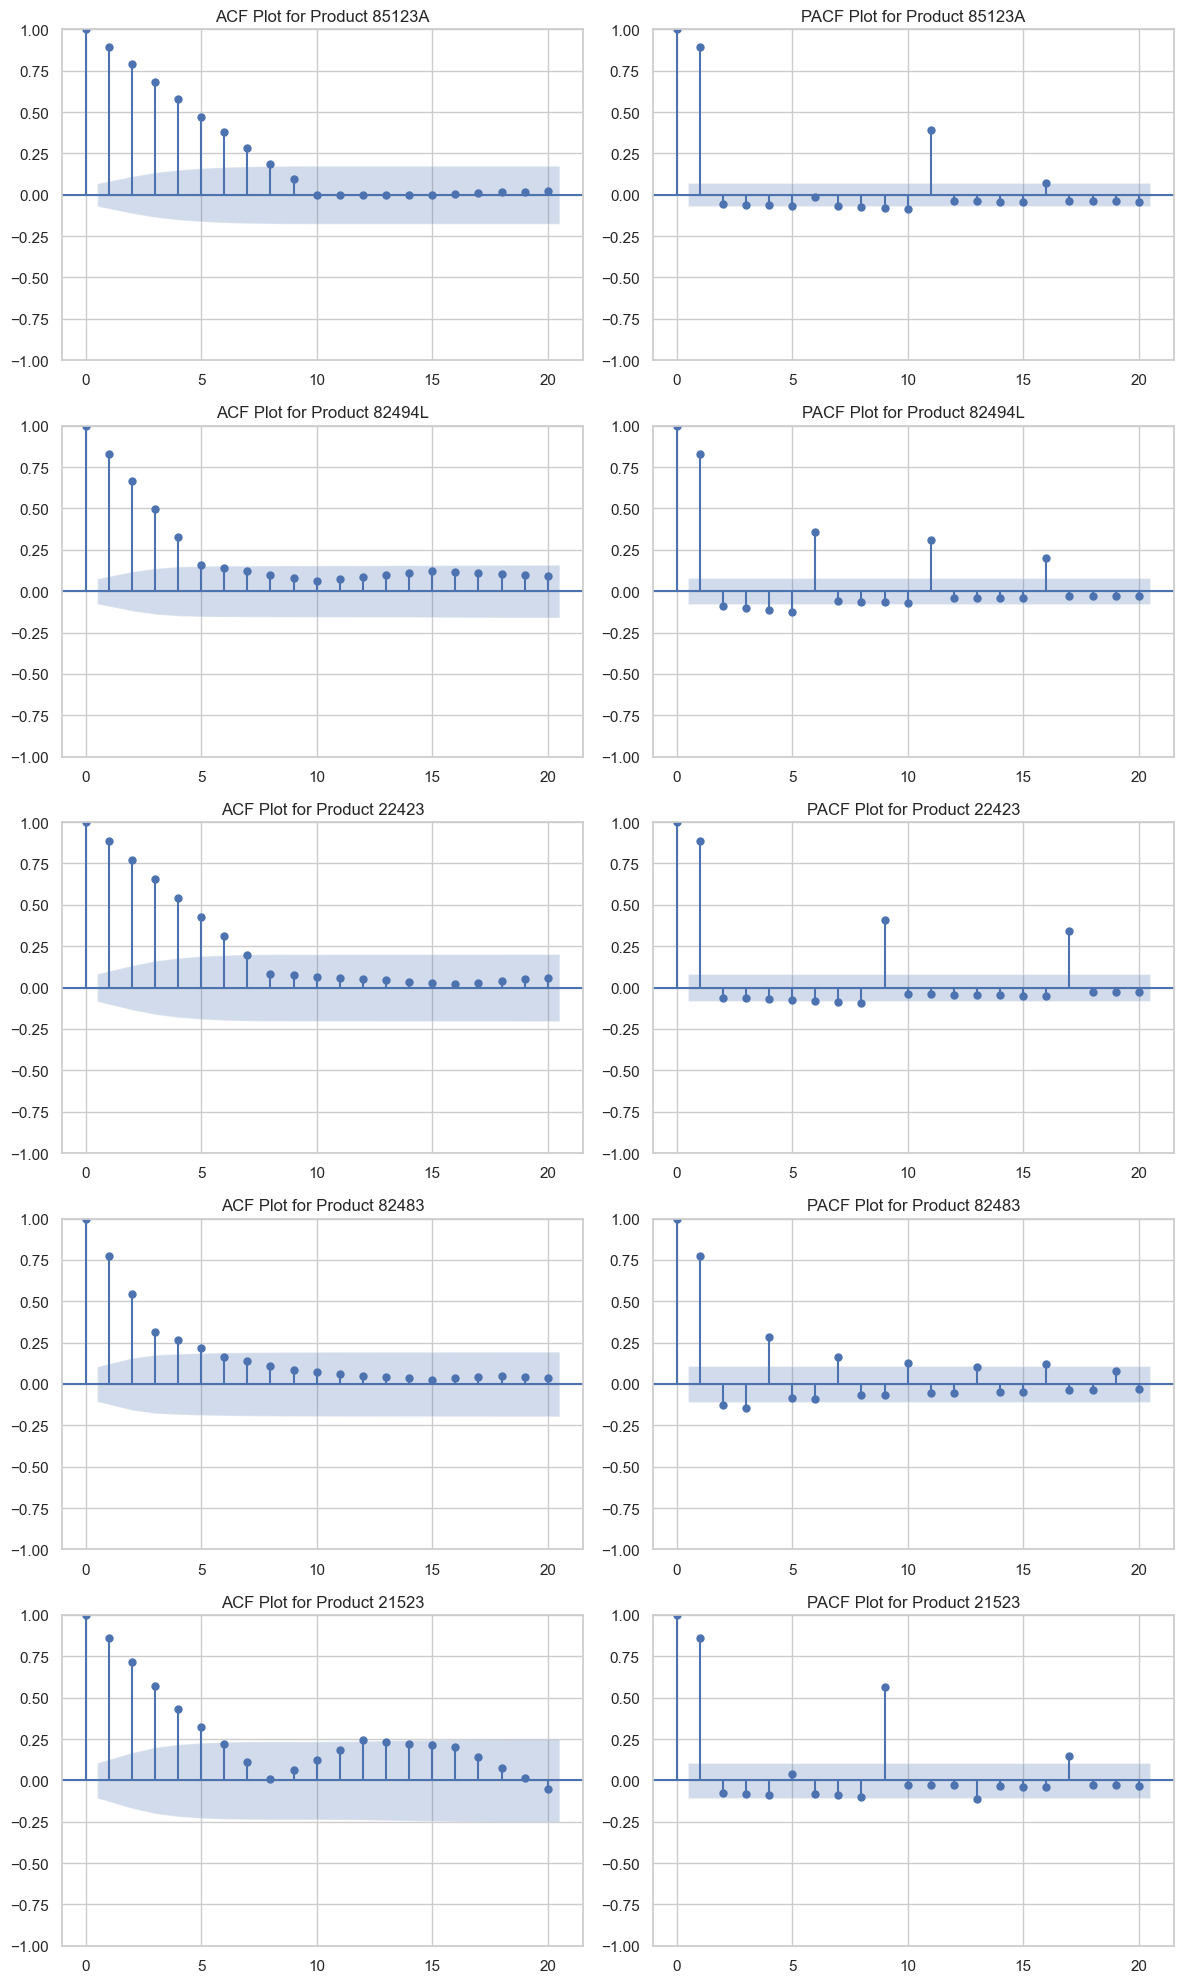

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Let's say you want to analyze the top products based on 'StockCode'
top_products = df['StockCode'].value_counts().index[:5]  # Top 5 products, for example

# Create subplots for ACF and PACF for each top product
num_products = len(top_products)
fig, axes = plt.subplots(num_products, 2, figsize=(12, 4 * num_products))

for i, product in enumerate(top_products):
    # Filter data for the current product
    sales = df[df['StockCode'] == product].set_index('InvoiceDate')['Quantity']
    
    # Determine the number of observations
    n = len(sales)
    
    # Set the number of lags dynamically
    max_lags = min(20, n // 2 - 1)
    
    # ACF Plot
    plot_acf(sales, lags=max_lags, ax=axes[i, 0], title=f'ACF Plot for Product {product}')

    # PACF Plot
    if max_lags > 0:  # Ensure there are valid lags to compute
        plot_pacf(sales, lags=max_lags, ax=axes[i, 1], title=f'PACF Plot for Product {product}')
    else:
        axes[i, 1].text(0.5, 0.5, 'Not enough data for PACF', fontsize=12, ha='center')
        axes[i, 1].set_title(f'PACF Plot for Product {product}')

plt.tight_layout()
plt.show()

### Analysis of Plots:
#### ACF Plot:
1. Look for significant spikes beyond the confidence interval (usually shown as shaded areas). This indicates autocorrelation at those lags.
2. A slow decay might suggest a non-stationary process (trend or seasonality).

#### PACF Plot:
1. The number of lags until the first significant spike indicates the order of the autoregressive part of an ARIMA model.
2. A cutoff after a few lags suggests a potential AR model, while a longer tail indicates a more complex relationship.